## 1.Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

## 2. Load and Prepare Data:

In [3]:
df=pd.read_csv("tele_churn.csv")
df

,Unnamed: 0,Number of Referrals,Monthly Charge,Total Regular Charges,Churn Status,Tenure in Months_1 - 12,Tenure in Months_13 - 24,Tenure in Months_25 - 36,Tenure in Months_37 - 48,Tenure in Months_49 - 60,...,Gender_Female,Gender_Male,Under 30_No,Under 30_Yes,Senior Citizen_No,Senior Citizen_Yes,Married_No,Married_Yes,Dependents_No,Dependents_Yes
0,0,0,41.236,39.65,1,1,0,0,0,0,...,0,1,1,0,0,1,1,0,1,0
1,1,1,83.876,633.30,1,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,2,0,99.268,1752.55,1,0,1,0,0,0,...,0,1,1,0,0,1,1,0,0,1
3,3,1,102.440,2514.50,1,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
4,4,1,79.560,2868.15,1,0,0,0,1,0,...,1,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,0,21.150,1419.40,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
7039,7039,1,84.800,1990.50,0,0,1,0,0,0,...,0,1,1,0,1,0,0,1,0,1
7040,7040,4,103.200,7362.90,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,1
7041,7041,1,29.600,346.45,0,1,0,0,0,0,...,1,0,1,0,1,0,0,1,0,1


In [6]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
df.head() #first 5 rows of the data

,Unnamed: 0,Number of Referrals,Monthly Charge,Total Regular Charges,Churn Status,Tenure in Months_1 - 12,Tenure in Months_13 - 24,Tenure in Months_25 - 36,Tenure in Months_37 - 48,Tenure in Months_49 - 60,...,Gender_Female,Gender_Male,Under 30_No,Under 30_Yes,Senior Citizen_No,Senior Citizen_Yes,Married_No,Married_Yes,Dependents_No,Dependents_Yes
0,0,0,41.236,39.65,1,1,0,0,0,0,...,0,1,1,0,0,1,1,0,1,0
1,1,1,83.876,633.30,1,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,2,0,99.268,1752.55,1,0,1,0,0,0,...,0,1,1,0,0,1,1,0,0,1
3,3,1,102.440,2514.50,1,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
4,4,1,79.560,2868.15,1,0,0,0,1,0,...,1,0,1,0,0,1,0,1,0,1


In [79]:
df.tail() #last 5 rows of the data

,Unnamed: 0,Number of Referrals,Monthly Charge,Total Regular Charges,Churn Status,Tenure in Months_1 - 12,Tenure in Months_13 - 24,Tenure in Months_25 - 36,Tenure in Months_37 - 48,Tenure in Months_49 - 60,...,Gender_Male,Under 30_No,Under 30_Yes,Senior Citizen_No,Senior Citizen_Yes,Married_No,Married_Yes,Dependents_No,Dependents_Yes,Probability of Churn
7038,7038,0,21.15,1419.40,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0.0
7039,7039,1,84.80,1990.50,0,0,1,0,0,0,...,1,1,0,1,0,0,1,0,1,0.0
7040,7040,4,103.20,7362.90,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0.0
7041,7041,1,29.60,346.45,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0.0
7042,7042,0,105.65,6844.50,0,0,0,0,0,0,...,1,1,0,1,0,1,0,1,0,0.0


In [5]:
x=df.drop('Churn Status',axis=1) #features (independent variables)
x

,Unnamed: 0,Number of Referrals,Monthly Charge,Total Regular Charges,Tenure in Months_1 - 12,Tenure in Months_13 - 24,Tenure in Months_25 - 36,Tenure in Months_37 - 48,Tenure in Months_49 - 60,Tenure in Months_61 - 72,...,Gender_Female,Gender_Male,Under 30_No,Under 30_Yes,Senior Citizen_No,Senior Citizen_Yes,Married_No,Married_Yes,Dependents_No,Dependents_Yes
0,0,0,41.236,39.65,1,0,0,0,0,0,...,0,1,1,0,0,1,1,0,1,0
1,1,1,83.876,633.30,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,2,0,99.268,1752.55,0,1,0,0,0,0,...,0,1,1,0,0,1,1,0,0,1
3,3,1,102.440,2514.50,0,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,1
4,4,1,79.560,2868.15,0,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,0,21.150,1419.40,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
7039,7039,1,84.800,1990.50,0,1,0,0,0,0,...,0,1,1,0,1,0,0,1,0,1
7040,7040,4,103.200,7362.90,0,0,0,0,0,1,...,1,0,1,0,1,0,0,1,0,1
7041,7041,1,29.600,346.45,1,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,1


In [6]:
y=df['Churn Status'] # Target variable (dependent variable)
y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Status, Length: 7043, dtype: int64

### Train Test Split-Split the data into training and testing sets

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## 3. Feature Scaling

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

## 4.Modelling

## 1. Logistic Regression Model

In [9]:
model_lr = LogisticRegression(random_state=30)
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=30)

##  Make Predictions

In [10]:
y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

##  Evaluate the Model

In [11]:
# Accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {lr_accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1552
           1       0.98      0.98      0.98       561

    accuracy                           0.99      2113
   macro avg       0.98      0.99      0.98      2113
weighted avg       0.99      0.99      0.99      2113

Confusion Matrix:
[[1538   14]
 [  11  550]]


Logistic Regression Model generated **99%** accuracy in data prediction

## 2.Decision Tree Classifier

In [12]:
model_dt = DecisionTreeClassifier(random_state=30)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=30)

In [13]:
y_pred_dt = model_dt.predict(x_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [14]:
# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {dt_accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1552
           1       1.00      1.00      1.00       561

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113

Confusion Matrix:
[[1552    0]
 [   0  561]]


### Decision Tree Model generated **100%** accuracy in data prediction

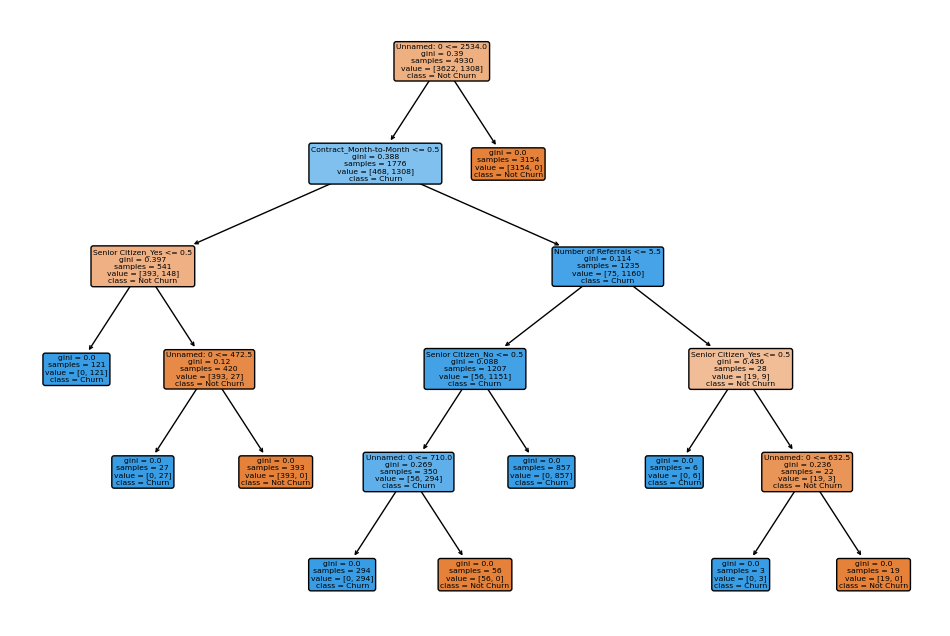

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model_dt, feature_names=x.columns, class_names=['Not Churn', 'Churn'], filled=True, rounded=True)
plt.show()


## 3.Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model_rf = RandomForestClassifier(random_state=30)

In [18]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=30)

In [19]:
y_pred_rf=model_rf.predict(x_test)

In [20]:
# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {rf_accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1552
           1       0.99      0.99      0.99       561

    accuracy                           0.99      2113
   macro avg       0.99      0.99      0.99      2113
weighted avg       0.99      0.99      0.99      2113

Confusion Matrix:
[[1547    5]
 [   8  553]]


### Random Forest Model generated **99%** accuracy in data prediction

### Feature Importance

In [21]:
# Access feature importances
feature_importances = model_rf.feature_importances_

# Display feature importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                           Feature  Importance
0                       Unnamed: 0    0.450139
42         Contract_Month-to-Month    0.063978
3            Total Regular Charges    0.046525
2                   Monthly Charge    0.042449
1              Number of Referrals    0.038729
44               Contract_Two Year    0.037802
22             Internet Type_Cable    0.027806
4          Tenure in Months_1 - 12    0.024471
54               Senior Citizen_No    0.022613
55              Senior Citizen_Yes    0.022468
43               Contract_One Year    0.014720
40               Unlimited Data_No    0.011164
41              Unlimited Data_Yes    0.011093
58                   Dependents_No    0.009947
59                  Dependents_Yes    0.009181
48      Payment Method_Credit Card    0.008766
9         Tenure in Months_61 - 72    0.007409
24       Internet Type_Fiber Optic    0.007092
20             Internet Service_No    0.006779
15                   Offer_Offer E    0.005711
25           

## 4.Support Vector Machine Model

In [22]:
model_svm = SVC(kernel='linear', random_state=30)  # You can also try other kernels like 'rbf' or 'poly'
model_svm.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=30)

In [23]:
y_pred_svm = model_svm.predict(X_test_scaled)
y_pred_svm

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [24]:
# Accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {svm_accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1552
           1       0.98      0.99      0.99       561

    accuracy                           0.99      2113
   macro avg       0.99      0.99      0.99      2113
weighted avg       0.99      0.99      0.99      2113

Confusion Matrix:
[[1541   11]
 [   4  557]]


### SVM Model generated **99%** accuracy in data prediction

## 5.K-Nearest Neighbors (KNN)

In [25]:
model = KNeighborsClassifier(n_neighbors=6)  
model.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=6)

In [26]:
y_pred_knn = model.predict(X_test_scaled)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
# Accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {knn_accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1552
           1       0.78      0.65      0.71       561

    accuracy                           0.86      2113
   macro avg       0.83      0.79      0.81      2113
weighted avg       0.86      0.86      0.86      2113

Confusion Matrix:
[[1451  101]
 [ 194  367]]


### KNN Model generated 86% accuracy in data prediction 

## 6.Gradient Boosting(XGBoost)

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_xgb = XGBClassifier(random_state=30)
model_xgb.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=30, ...)

In [29]:
y_pred_xgb = model_xgb.predict(x_test)
y_pred_xgb

array([0, 0, 0, ..., 0, 0, 1])

In [30]:
# Accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {xgb_accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1552
           1       1.00      0.99      1.00       561

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113

Confusion Matrix:
[[1550    2]
 [   3  558]]


In [31]:
# Access feature importances
feature_importances = model_xgb.feature_importances_

# Display feature importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                           Feature  Importance
0                       Unnamed: 0    0.484012
42         Contract_Month-to-Month    0.412105
1              Number of Referrals    0.055681
54               Senior Citizen_No    0.016207
38              Streaming Music_No    0.006000
45            Paperless Billing_No    0.005961
10                      Offer_None    0.003243
49     Payment Method_Mailed Check    0.003123
36             Streaming Movies_No    0.002491
22             Internet Type_Cable    0.002293
2                   Monthly Charge    0.001767
24       Internet Type_Fiber Optic    0.001412
23               Internet Type_DSL    0.001362
4          Tenure in Months_1 - 12    0.001161
3            Total Regular Charges    0.001158
40               Unlimited Data_No    0.000696
30       Device Protection Plan_No    0.000587
28                Online Backup_No    0.000338
9         Tenure in Months_61 - 72    0.000155
18               Multiple Lines_No    0.000139
32         Pr

### **Gradient Boosting(XGBoost)Model generated 99.7% accuracy in data prediction.**

## 7.Naive Bayes Model

In [32]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)


GaussianNB()

In [33]:
y_pred_nb = model_nb.predict(x_test)
y_pred_nb

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [34]:
# Accuracy
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {nb_accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1552
           1       0.71      0.82      0.76       561

    accuracy                           0.87      2113
   macro avg       0.82      0.85      0.84      2113
weighted avg       0.87      0.87      0.87      2113

Confusion Matrix:
[[1367  185]
 [  99  462]]


### Naive Bayes Model generated 87%accuracy in data prediction.

In [35]:
# Compare Several models according to their Accuracies
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
              'Decision Tree', 'Random Forest','Gradient Boost','Naive Bayes'],
    'Score': [lr_accuracy, svm_accuracy, knn_accuracy, 
              dt_accuracy, rf_accuracy,xgb_accuracy,nb_accuracy]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

,Score,Model
0,1.000000,Decision Tree
1,0.997634,Gradient Boost
2,0.993848,Random Forest
3,0.992901,Support Vector Machine
4,0.988168,Logistic Regression
5,0.865594,Naive Bayes
6,0.860388,K-Nearest Neighbor


In [62]:
#Generate confusion matrix for Gradient Boost model as it has maximum Accuracy

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[1552    0]
 [   0  561]]


In [66]:
# Predict the probability of Churn of each customer
df['Probability of Churn'] = model_dt.predict_proba(df[x_test.columns])[:,1]

In [67]:
# Create a Dataframe showcasing probability of Churn of each customer
df[['Churn Status','Probability of Churn']].head()

,Churn Status,Probability of Churn
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0


In [68]:
df[['Churn Status','Probability of Churn']].tail()

,Churn Status,Probability of Churn
7038,0,0.0
7039,0,0.0
7040,0,0.0
7041,0,0.0
7042,0,0.0


In [69]:
df[['Churn Status','Probability of Churn']]

,Churn Status,Probability of Churn
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
...,...,...
7038,0,0.0
7039,0,0.0
7040,0,0.0
7041,0,0.0


In [70]:
df['Probability of Churn'].unique()

array([1., 0.])

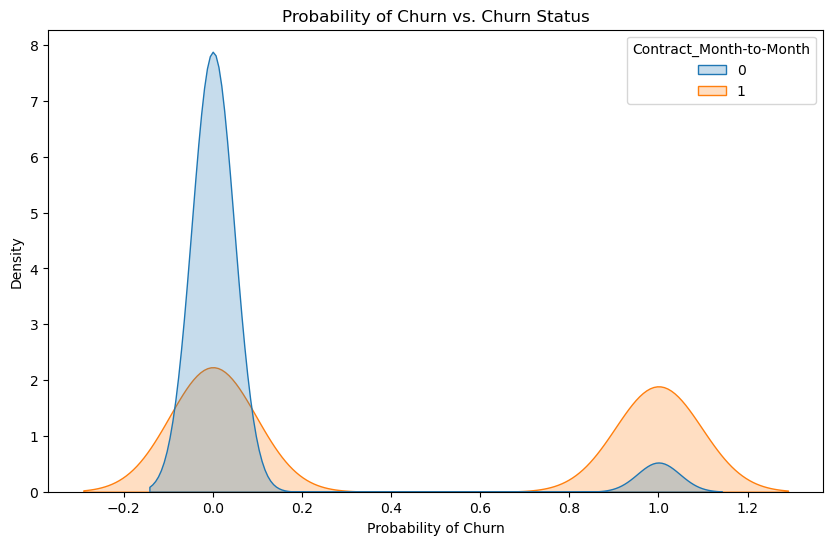

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the KDE plot

plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x='Probability of Churn', hue='Contract_Month-to-Month', fill=True, common_norm=False)
plt.title('Probability of Churn vs. Churn Status')
plt.xlabel('Probability of Churn')
plt.ylabel('Density')
plt.show()

### Pickling the model

In [73]:
import pickle

In [74]:
filename = 'model_dec.sav'

In [75]:
pickle.dump(model_dt, open(filename, 'wb'))

In [76]:
load_model = pickle.load(open(filename, 'rb'))

In [77]:
model_score_dt = load_model.score(x_test, y_test)

In [78]:
model_score_dt

1.0

### Our final model i.e. Decision Tree, is now ready and dumped in model_dec.sav, which can be used later.